**Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"**


In [2]:
from google.colab import files
upload=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [3]:
import numpy as np
import pandas as pd
df=pd.read_csv("Fraud_check.csv")
df

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [4]:
list(df)

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [5]:
df["Taxable.Income"]=["Good" if value > 30000
                      else "Risky" for value in df['Taxable.Income']]

In [6]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

Columns_to_encoder=["Undergrad","Marital.Status","Urban","Taxable.Income"]
for columns in Columns_to_encoder:
 df[columns]=LE.fit_transform(df[columns])
df

Undergrad  Marital.Status  Taxable.Income  City.Population  \
0            0               2               0            50047   
1            1               0               0           134075   
2            0               1               0           160205   
3            1               2               0           193264   
4            0               1               0            27533   
..         ...             ...             ...              ...   
595          1               0               0            39492   
596          1               0               0            55369   
597          0               0               0           154058   
598          1               1               0           180083   
599          0               0               0           158137   

     Work.Experience  Urban  
0                 10      1  
1                 18      1  
2                 30      1  
3                 15      1  
4                 28      0  
..               ...    ...  
595                7      1  
596                2      1  
597                0      1  
598               17      0  
599               16      0  

[600 rows x 6 columns]

In [7]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
X=df[["Undergrad","Marital.Status","City.Population","Work.Experience","Urban"]]
Y=df["Taxable.Income"]

In [9]:
df.corr()

Undergrad  Marital.Status  Taxable.Income  City.Population  \
Undergrad         1.000000        0.042407        0.012523         0.079579   
Marital.Status    0.042407        1.000000        0.006081        -0.001564   
Taxable.Income    0.012523        0.006081        1.000000         0.012225   
City.Population   0.079579       -0.001564        0.012225         1.000000   
Work.Experience  -0.005362       -0.002213       -0.001972         0.013135   
Urban            -0.000267        0.064562        0.004830        -0.040098   

                 Work.Experience     Urban  
Undergrad              -0.005362 -0.000267  
Marital.Status         -0.002213  0.064562  
Taxable.Income         -0.001972  0.004830  
City.Population         0.013135 -0.040098  
Work.Experience         1.000000 -0.094559  
Urban                  -0.094559  1.000000

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [11]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [12]:
Y_pred_train=DTC.predict(X_train)
Y_pred_test=DTC.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_train,Y_pred_train)
ac2=accuracy_score(Y_test,Y_pred_test)
print("Accuracy Score for Training Data:",ac1.round(3))
print("Accuracy Score for Test Data:",ac2.round(3))

Accuracy Score for Training Data: 1.0
Accuracy Score for Test Data: 0.64


In [14]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=100,
                           max_samples=0.6,
                           max_features=0.7)
RFC.fit(X_train,Y_train)

RandomForestClassifier(max_features=0.7, max_samples=0.6)

In [15]:
Y_pred_train=RFC.predict(X_train)
Y_pred_test=RFC.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_train,Y_pred_train)
ac2=accuracy_score(Y_test,Y_pred_test)
print("Accuracy Score for Training Data:",ac1.round(3))
print("Accuracy Score fro Test Data:",ac2.round(3))

Accuracy Score for Training Data: 0.951
Accuracy Score fro Test Data: 0.773


[Text(0.6000928706923806, 0.9791666666666666, 'x[3] <= 20.5\ngini = 0.331\nsamples = 450\nvalue = [356, 94]'),
 Text(0.4088484034144799, 0.9375, 'x[3] <= 17.5\ngini = 0.358\nsamples = 304\nvalue = [233, 71]'),
 Text(0.2628438191590262, 0.8958333333333334, 'x[2] <= 197925.0\ngini = 0.33\nsamples = 269\nvalue = [213, 56]'),
 Text(0.2527268416060702, 0.8541666666666666, 'x[2] <= 80940.5\ngini = 0.323\nsamples = 267\nvalue = [213, 54]'),
 Text(0.15428390768257982, 0.8125, 'x[2] <= 52912.0\ngini = 0.26\nsamples = 91\nvalue = [77, 14]'),
 Text(0.0758773316471704, 0.7708333333333334, 'x[2] <= 52405.5\ngini = 0.343\nsamples = 41\nvalue = [32, 9]'),
 Text(0.06576035409421435, 0.7291666666666666, 'x[1] <= 0.5\ngini = 0.32\nsamples = 40\nvalue = [32, 8]'),
 Text(0.02023395510591211, 0.6875, 'x[2] <= 27057.0\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.010116977552956055, 0.6458333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.030350932658868162, 0.6458333333333334, 'x[2] 

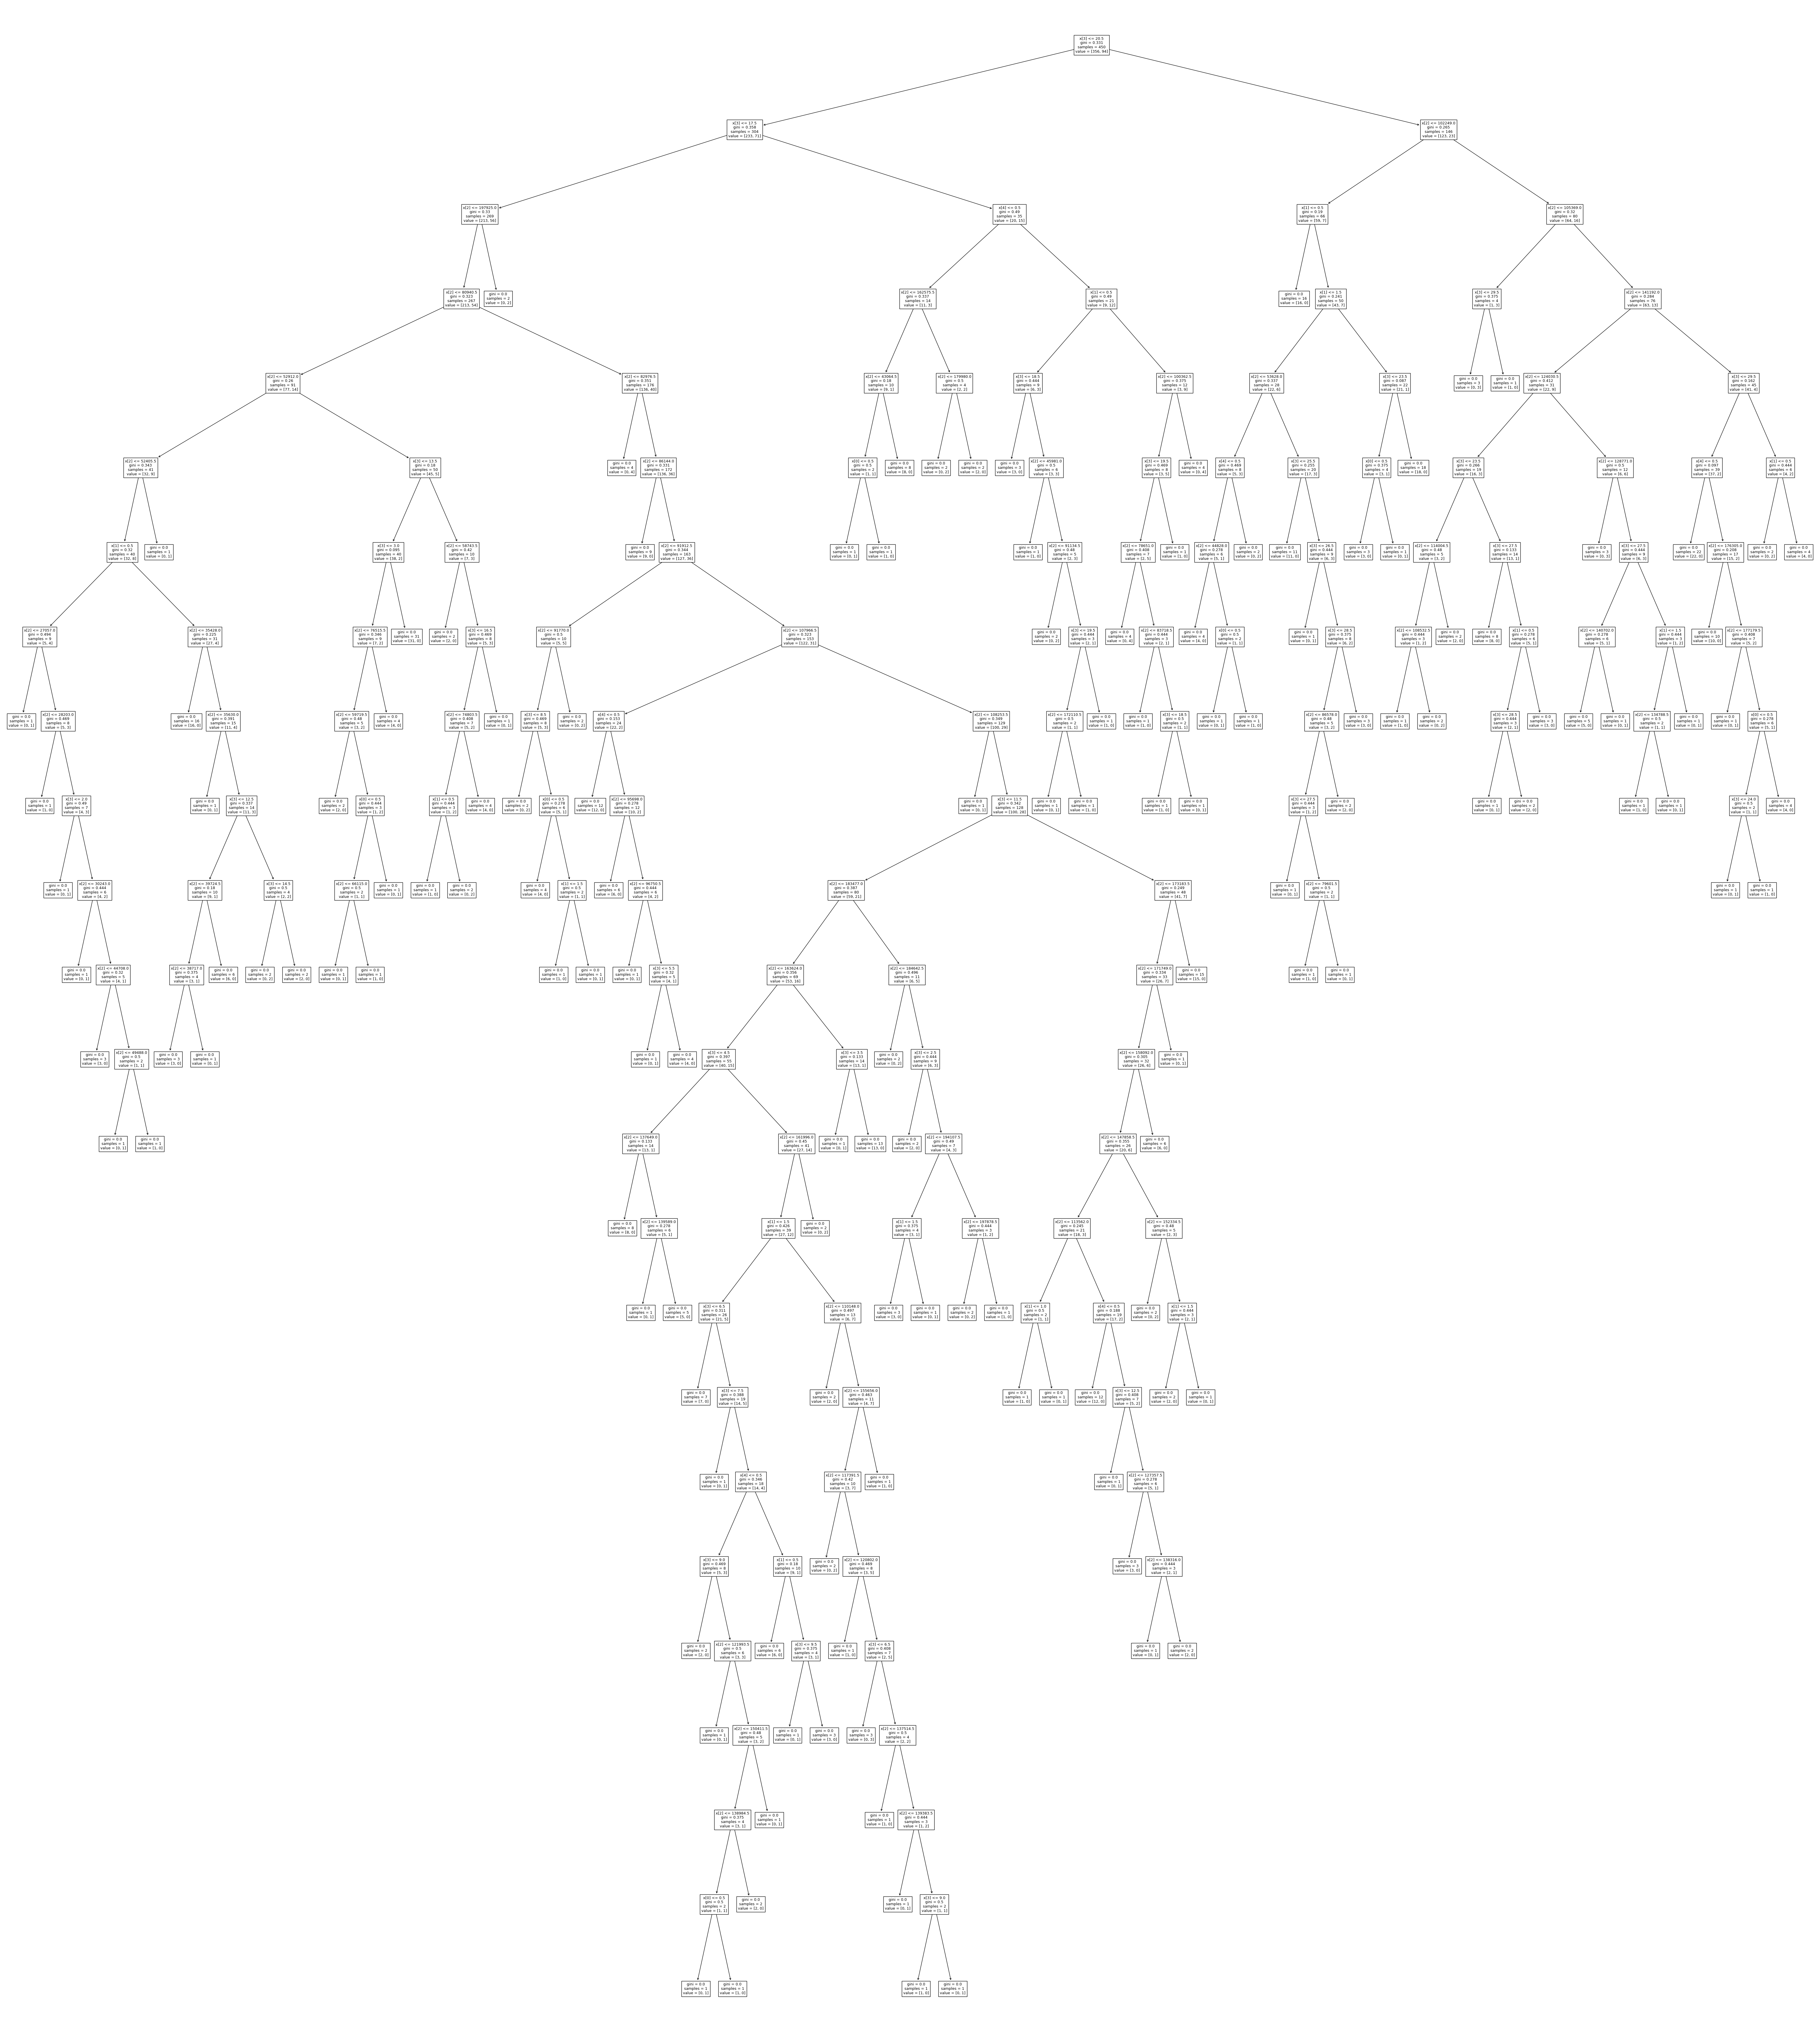

In [22]:
from sklearn import tree
import matplotlib.pyplot as  plt
plt.figure(figsize=(80, 90))
tree.plot_tree(DTC)

In [25]:
import matplotlib.pyplot as plt
from sklearn import tree
from graphviz import Source
plt.figure(figsize=(100, 90))
tree.plot_tree(DTC, filled=True, rounded=True)
plt.show()